[View in Colaboratory](https://colab.research.google.com/github/hypetrainai/hypetrain/blob/deepkaraoke/deepkaraoke/karaoke_mp3_preprocess.ipynb)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import pickle
import random
import scipy.io.wavfile
import scipy.signal
import shutil
import tempfile

In [62]:
#@title Parse data dir for *.mp3 and *_OffVocal.mp3

SAMPLING_RATE = 16000
data_dir = 'data/16k_LARGE' #@param
data_dir = Path.resolve(Path(data_dir))
print('Loading from', data_dir)

off_vocal_files = sorted([str(f.as_posix()) for f in data_dir.glob('*_OffVocal.mp3')])
on_vocal_files = [f.replace('_OffVocal', '') for f in off_vocal_files]
print('Loaded %d files' % len(off_vocal_files))

Loading from /home/joe/projects/hypetrain/deepkaraoke/data/16k_LARGE
Loaded 88 files


In [63]:
def FindInSeq(seq, pattern):
  """Finds 'pattern' in 'seq'.
  
  The pattern will be perfectly aligned to seq, but there may be a signal that's
  been added or removed. This tries to find that alignment.
  
  Args:
    seq: the sequence containing the pattern to find, with an additional signal
      either added or removed.
    pattern: the pattern to find. Must be no longer than seq. Must be reasonably
      close to the length of seq.
      
  Raises:
    ValueError if the pattern is longer than seq or is much shorter than seq.
  
  Returns:
    the index of 'pattern' in 'seq'.
  """
  if len(pattern) > len(seq):
    raise ValueError('pattern must be no longer than seq.')
  if len(seq) - len(pattern) > 5 * SAMPLING_RATE:
    raise ValueError('pattern must not be too much shorter than seq.')
  
  seq = seq / np.std(seq)
  pattern = pattern / np.std(pattern)
  corr = scipy.signal.correlate(seq, pattern, 'valid', 'fft')
  if np.argmax(corr) != 0:
    plt.plot(range(len(corr)), corr)
    plt.show()
  return np.argmax(corr)

sox WARN sox: `/tmp/tmpgw0g8u6t/on_vocal.wav' output clipped 1028 samples; decrease volume?
sox WARN sox: `/tmp/tmpgw0g8u6t/off_vocal.wav' output clipped 294 samples; decrease volume?


/home/joe/.local/lib/python3.5/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


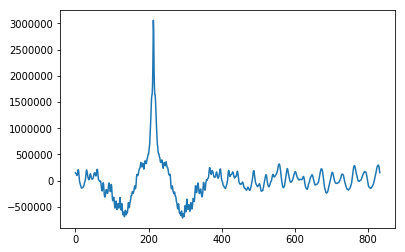

ASTRO=PHERE.mp3: shifting by 213.


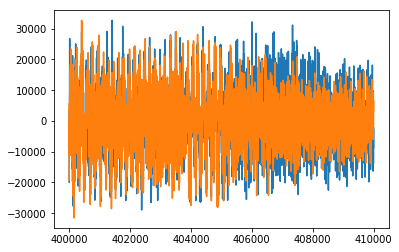

sox WARN sox: `/tmp/tmpa455dx4s/on_vocal.wav' output clipped 38 samples; decrease volume?
sox WARN sox: `/tmp/tmpa455dx4s/off_vocal.wav' output clipped 19 samples; decrease volume?


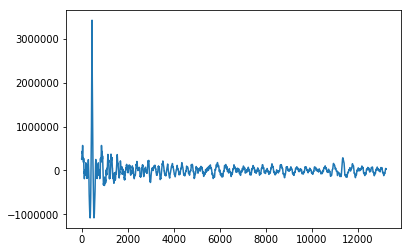

Air.mp3: shifting by 451.


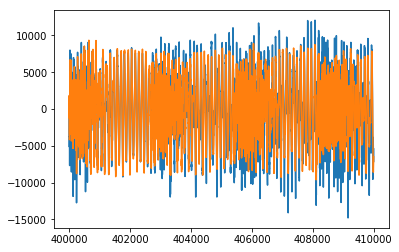

sox WARN sox: `/tmp/tmp2_ngho4u/on_vocal.wav' output clipped 7 samples; decrease volume?
sox WARN sox: `/tmp/tmp2_ngho4u/off_vocal.wav' output clipped 6 samples; decrease volume?


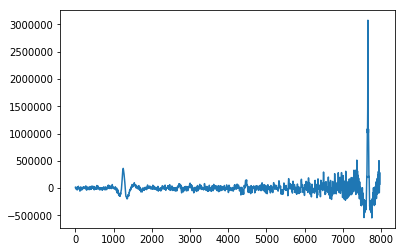

AkakuYurameku.mp3: shifting by 7657.


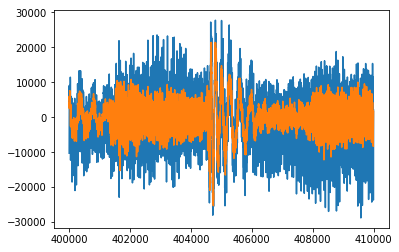

sox WARN sox: `/tmp/tmp9if51gw8/on_vocal.wav' output clipped 9 samples; decrease volume?
sox WARN sox: `/tmp/tmp9if51gw8/off_vocal.wav' output clipped 1 samples; decrease volume?


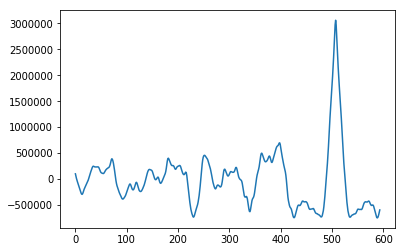

AlbatrossnoTegami.mp3: shifting by 507.


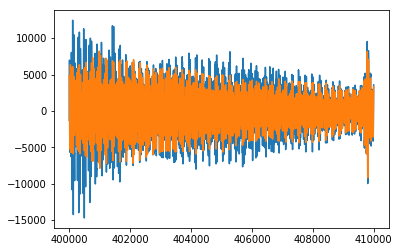

sox WARN sox: `/tmp/tmps1u635rw/on_vocal.wav' output clipped 718 samples; decrease volume?
sox WARN sox: `/tmp/tmps1u635rw/off_vocal.wav' output clipped 474 samples; decrease volume?


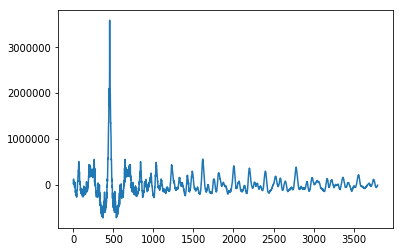

AmenoKaze.mp3: shifting by 454.


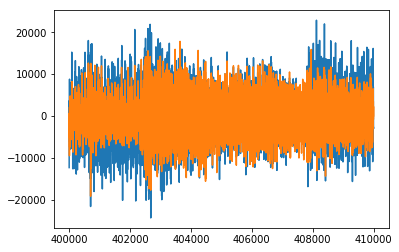

sox WARN sox: `/tmp/tmpenrr35vk/on_vocal.wav' output clipped 265 samples; decrease volume?
sox WARN sox: `/tmp/tmpenrr35vk/off_vocal.wav' output clipped 165 samples; decrease volume?


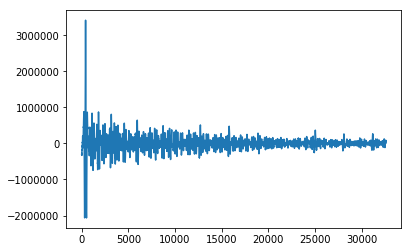

AmenoLive.mp3: shifting by 418.


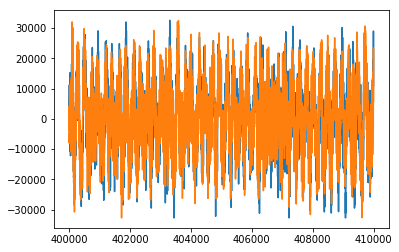

sox WARN sox: `/tmp/tmpnfs3wkba/on_vocal.wav' output clipped 667 samples; decrease volume?
sox WARN sox: `/tmp/tmpnfs3wkba/off_vocal.wav' output clipped 207 samples; decrease volume?


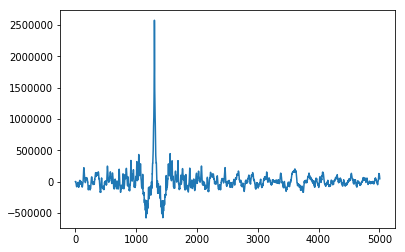

AnatawoMamoruKentoNarou.mp3: shifting by 1300.


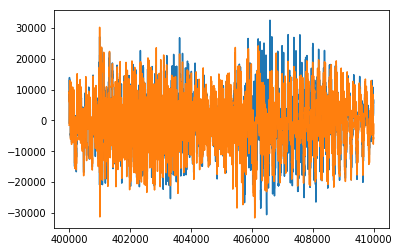

sox WARN sox: `/tmp/tmpy9n6idgn/on_vocal.wav' output clipped 29083 samples; decrease volume?
sox WARN sox: `/tmp/tmpy9n6idgn/off_vocal.wav' output clipped 9331 samples; decrease volume?
Aria.mp3: shifting by 0.


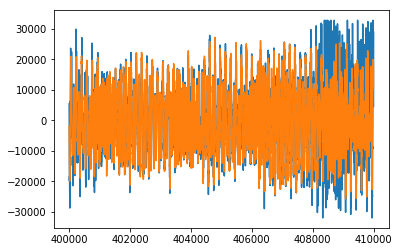

sox WARN sox: `/tmp/tmp5kkdtx_9/on_vocal.wav' output clipped 2157 samples; decrease volume?
sox WARN sox: `/tmp/tmp5kkdtx_9/off_vocal.wav' output clipped 1399 samples; decrease volume?


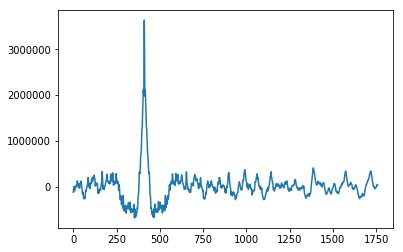

Astro=Hope.mp3: shifting by 410.


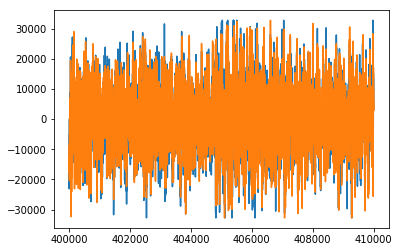

sox WARN sox: `/tmp/tmphpy6igi5/on_vocal.wav' output clipped 371 samples; decrease volume?
sox WARN sox: `/tmp/tmphpy6igi5/off_vocal.wav' output clipped 223 samples; decrease volume?


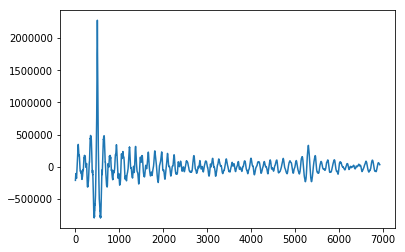

BakerBakerParadox.mp3: shifting by 499.


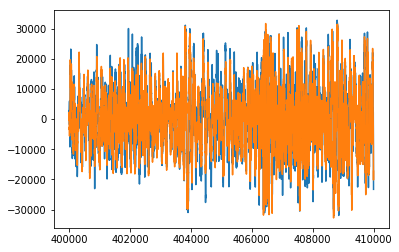

sox WARN sox: `/tmp/tmpysy6ch1b/off_vocal.wav' output clipped 27 samples; decrease volume?


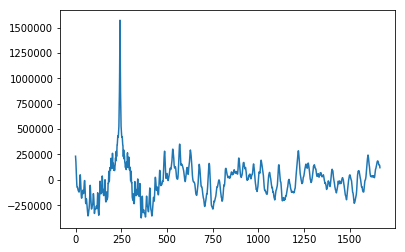

BelieveInYourFantasy.mp3: shifting by 243.


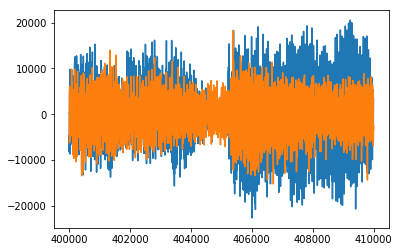

ChiyoriUtau.mp3: shifting by 0.


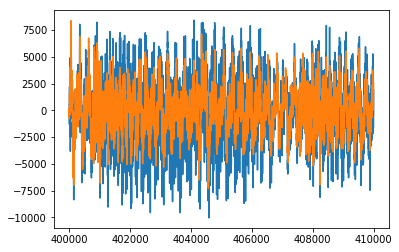

sox WARN sox: `/tmp/tmp0z3bak3q/on_vocal.wav' output clipped 1754 samples; decrease volume?
sox WARN sox: `/tmp/tmp0z3bak3q/off_vocal.wav' output clipped 544 samples; decrease volume?


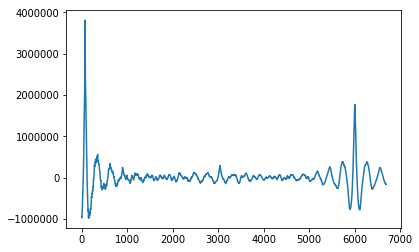

CrazyForYou.mp3: shifting by 76.


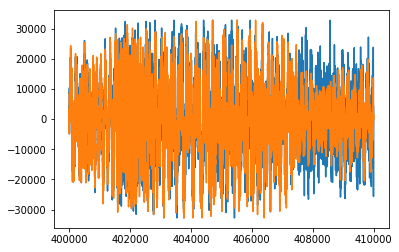

sox WARN sox: `/tmp/tmpyz2b_9ll/on_vocal.wav' output clipped 3760 samples; decrease volume?
sox WARN sox: `/tmp/tmpyz2b_9ll/off_vocal.wav' output clipped 1849 samples; decrease volume?
CryOutToYourSky.mp3: shifting by 0.


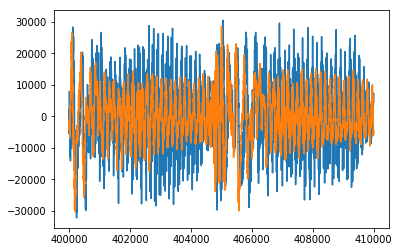

Dearest.mp3: shifting by 0.


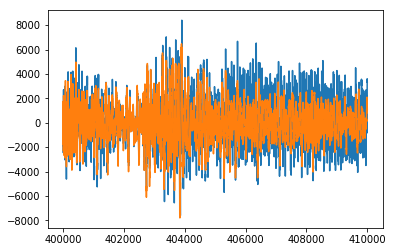

sox WARN sox: `/tmp/tmpoq9x1fgn/on_vocal.wav' output clipped 1407 samples; decrease volume?
sox WARN sox: `/tmp/tmpoq9x1fgn/off_vocal.wav' output clipped 446 samples; decrease volume?
Depressing.mp3: shifting by 0.


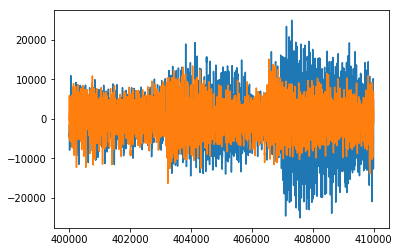

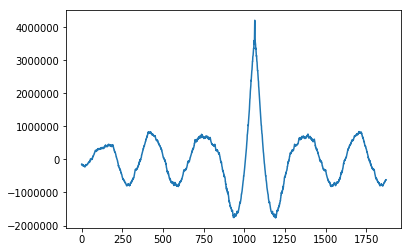

Encounter.mp3: shifting by 1064.


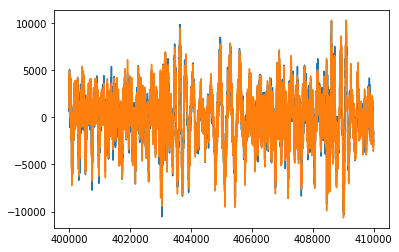

sox WARN sox: `/tmp/tmp002sub5e/on_vocal.wav' output clipped 1307 samples; decrease volume?
sox WARN sox: `/tmp/tmp002sub5e/off_vocal.wav' output clipped 698 samples; decrease volume?


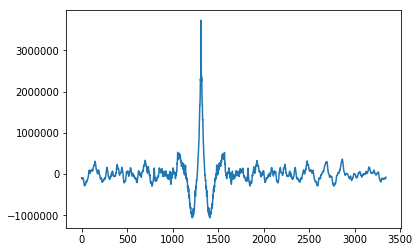

FarAwayHighWay.mp3: shifting by 1312.


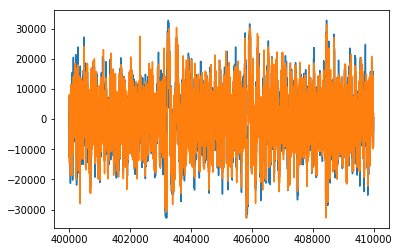

sox WARN sox: `/tmp/tmpirhxfdu9/on_vocal.wav' output clipped 1210 samples; decrease volume?
sox WARN sox: `/tmp/tmpirhxfdu9/off_vocal.wav' output clipped 528 samples; decrease volume?
FukagyakuGetsuShitaTouhikou.mp3: shifting by 0.


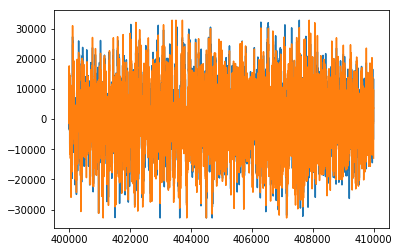

sox WARN sox: `/tmp/tmpp_s_jlta/on_vocal.wav' output clipped 181 samples; decrease volume?
sox WARN sox: `/tmp/tmpp_s_jlta/off_vocal.wav' output clipped 82 samples; decrease volume?


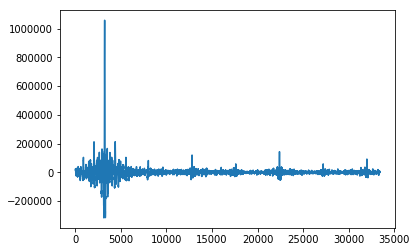

GanbareJukensei.mp3: shifting by 3209.


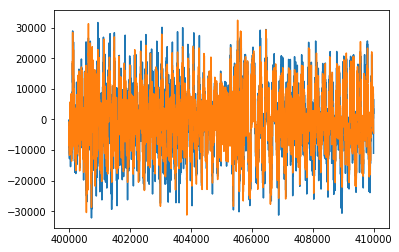

sox WARN sox: `/tmp/tmp3yvftb2f/on_vocal.wav' output clipped 8986 samples; decrease volume?
sox WARN sox: `/tmp/tmp3yvftb2f/off_vocal.wav' output clipped 701 samples; decrease volume?
GetYourPartyOn.mp3: shifting by 0.


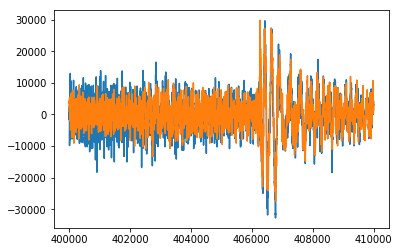

sox WARN sox: `/tmp/tmpxelm0pia/on_vocal.wav' output clipped 10957 samples; decrease volume?
sox WARN sox: `/tmp/tmpxelm0pia/off_vocal.wav' output clipped 1486 samples; decrease volume?
<class 'numpy.int16'>


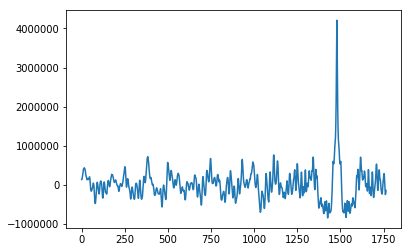

HalloweenNightParade.mp3: shifting by 1479.


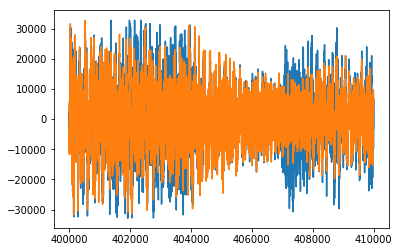

sox WARN sox: `/tmp/tmpq8psu4zk/on_vocal.wav' output clipped 6411 samples; decrease volume?
sox WARN sox: `/tmp/tmpq8psu4zk/off_vocal.wav' output clipped 3239 samples; decrease volume?


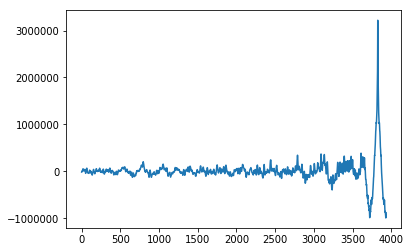

HanoGotoku.mp3: shifting by 3826.


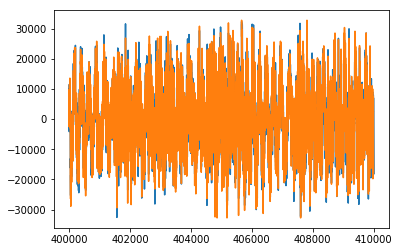

sox WARN sox: `/tmp/tmp4s383id8/on_vocal.wav' output clipped 932 samples; decrease volume?
sox WARN sox: `/tmp/tmp4s383id8/off_vocal.wav' output clipped 981 samples; decrease volume?
HatsukoiStroke.mp3: shifting by 0.


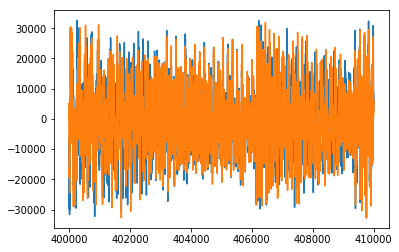

sox WARN sox: `/tmp/tmpfji5rt77/on_vocal.wav' output clipped 3071 samples; decrease volume?
sox WARN sox: `/tmp/tmpfji5rt77/off_vocal.wav' output clipped 910 samples; decrease volume?


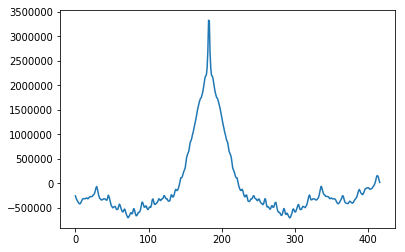

HighFreeSpirits.mp3: shifting by 182.


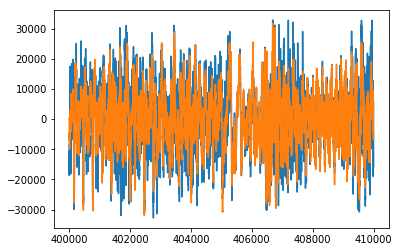

sox WARN sox: `/tmp/tmpfio999fg/on_vocal.wav' output clipped 474 samples; decrease volume?
sox WARN sox: `/tmp/tmpfio999fg/off_vocal.wav' output clipped 328 samples; decrease volume?


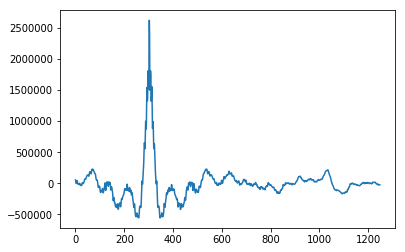

HitareKanbiTaruKaimu.mp3: shifting by 303.


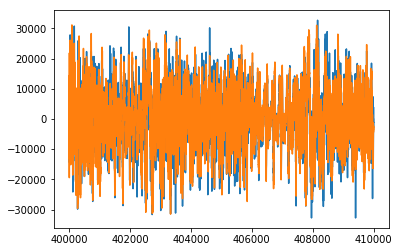

sox WARN sox: `/tmp/tmpthm9pngu/on_vocal.wav' output clipped 1242 samples; decrease volume?
sox WARN sox: `/tmp/tmpthm9pngu/off_vocal.wav' output clipped 449 samples; decrease volume?


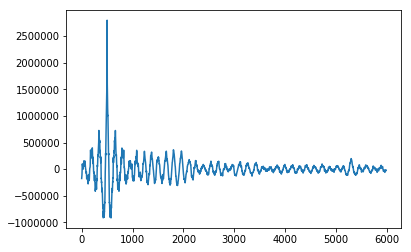

HitodenashiRomanesque.mp3: shifting by 501.


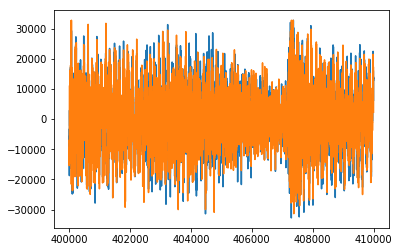

sox WARN sox: `/tmp/tmp1t4w08il/on_vocal.wav' output clipped 2793 samples; decrease volume?
sox WARN sox: `/tmp/tmp1t4w08il/off_vocal.wav' output clipped 1621 samples; decrease volume?


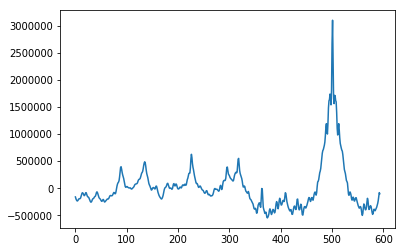

HitotsunoNegai.mp3: shifting by 501.


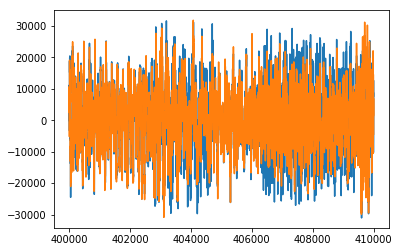

sox WARN sox: `/tmp/tmpfij_72cg/on_vocal.wav' output clipped 11 samples; decrease volume?
sox WARN sox: `/tmp/tmpfij_72cg/off_vocal.wav' output clipped 1 samples; decrease volume?


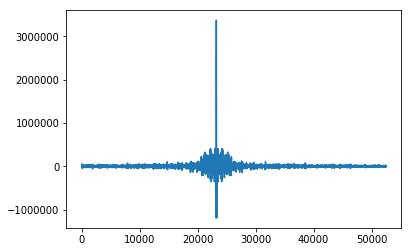

Ideal.mp3: shifting by 23219.


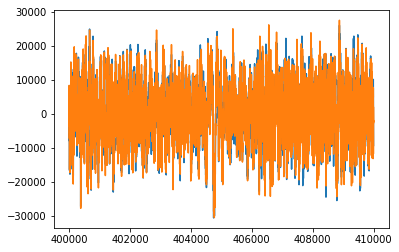

sox WARN sox: `/tmp/tmp5a167ik8/on_vocal.wav' output clipped 2916 samples; decrease volume?
sox WARN sox: `/tmp/tmp5a167ik8/off_vocal.wav' output clipped 1207 samples; decrease volume?


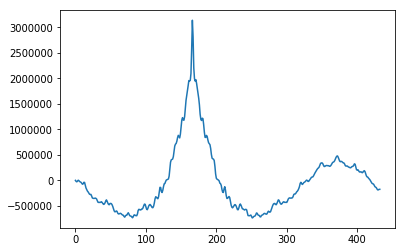

IncubatedDream.mp3: shifting by 166.


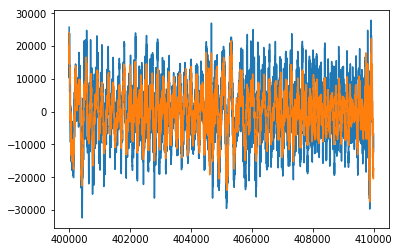

sox WARN sox: `/tmp/tmpclz36z35/on_vocal.wav' output clipped 1814 samples; decrease volume?
sox WARN sox: `/tmp/tmpclz36z35/off_vocal.wav' output clipped 721 samples; decrease volume?


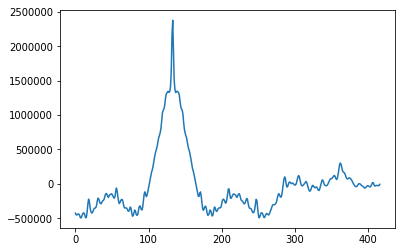

Innocence.mp3: shifting by 133.


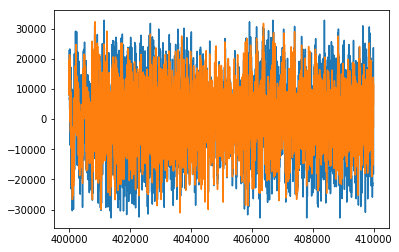

sox WARN sox: `/tmp/tmpfsgfucng/on_vocal.wav' output clipped 1466 samples; decrease volume?
sox WARN sox: `/tmp/tmpfsgfucng/off_vocal.wav' output clipped 1329 samples; decrease volume?


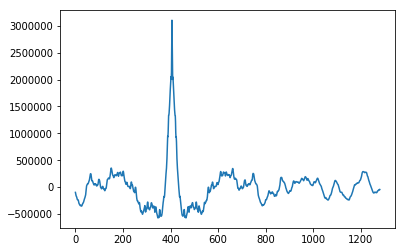

JanoMichi.mp3: shifting by 406.


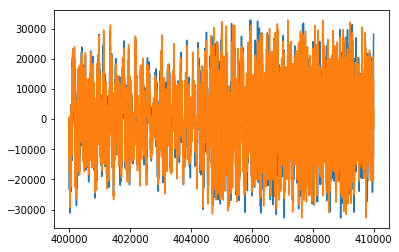

sox WARN sox: `/tmp/tmpjhlzj67c/on_vocal.wav' output clipped 447 samples; decrease volume?
sox WARN sox: `/tmp/tmpjhlzj67c/off_vocal.wav' output clipped 433 samples; decrease volume?


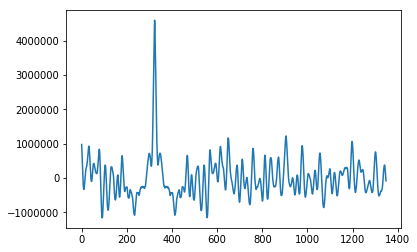

JedarunoKaikou.mp3: shifting by 323.


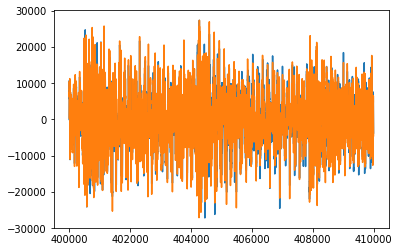

sox WARN sox: `/tmp/tmprd5j0_i7/on_vocal.wav' output clipped 334 samples; decrease volume?
sox WARN sox: `/tmp/tmprd5j0_i7/off_vocal.wav' output clipped 140 samples; decrease volume?
JinjatoHitotoPikopikonoRekishi.mp3: shifting by 0.


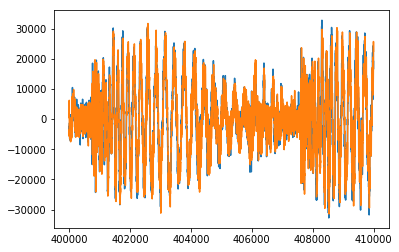

KazegaSaeruyoriHayaku.mp3: shifting by 0.


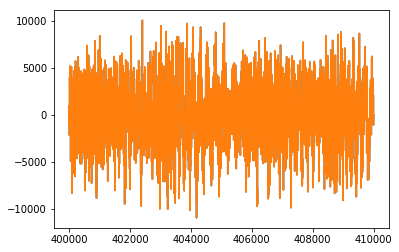

sox WARN sox: `/tmp/tmp_zzjmzyr/on_vocal.wav' output clipped 334 samples; decrease volume?
sox WARN sox: `/tmp/tmp_zzjmzyr/off_vocal.wav' output clipped 177 samples; decrease volume?


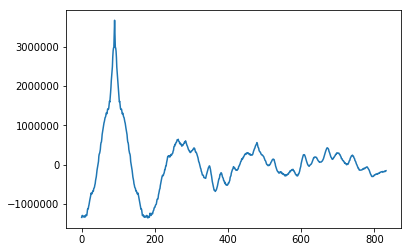

KoinoSerenade.mp3: shifting by 90.


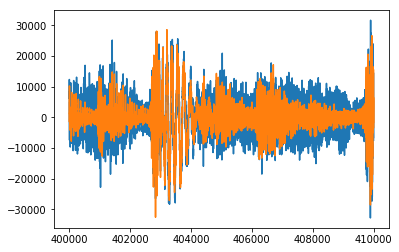

sox WARN sox: `/tmp/tmp_egg5cn0/on_vocal.wav' output clipped 272 samples; decrease volume?
sox WARN sox: `/tmp/tmp_egg5cn0/off_vocal.wav' output clipped 98 samples; decrease volume?


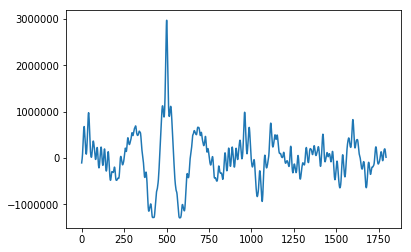

KoyoimoKyuutodeAimashou.mp3: shifting by 501.


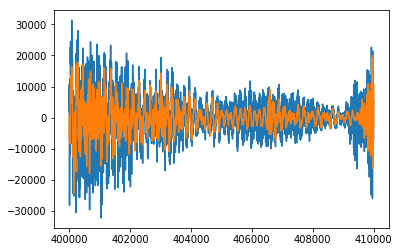

KyoumeiShinaiAinoKatachi.mp3: shifting by 0.


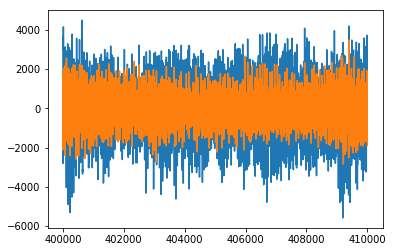

sox WARN sox: `/tmp/tmphp2yxs6q/on_vocal.wav' output clipped 19958 samples; decrease volume?
sox WARN sox: `/tmp/tmphp2yxs6q/off_vocal.wav' output clipped 7255 samples; decrease volume?
LWCO.mp3: shifting by 0.


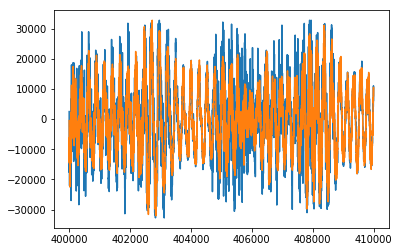

sox WARN sox: `/tmp/tmp3qe293ke/on_vocal.wav' output clipped 250 samples; decrease volume?
sox WARN sox: `/tmp/tmp3qe293ke/off_vocal.wav' output clipped 27 samples; decrease volume?


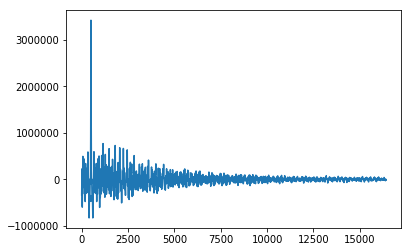

Landscape.mp3: shifting by 500.


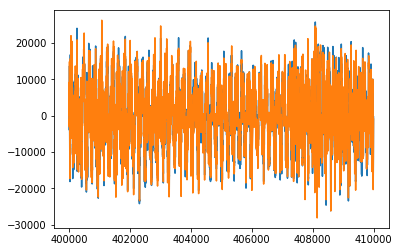

sox WARN sox: `/tmp/tmps1c5_yuj/on_vocal.wav' output clipped 2126 samples; decrease volume?
sox WARN sox: `/tmp/tmps1c5_yuj/off_vocal.wav' output clipped 1232 samples; decrease volume?
LaplaceFantasia.mp3: shifting by 0.


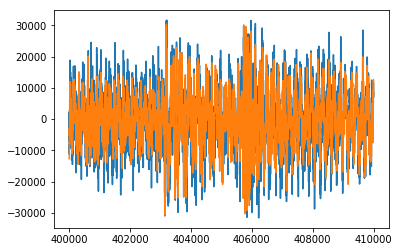

sox WARN sox: `/tmp/tmpaxx4tvdf/on_vocal.wav' output clipped 855 samples; decrease volume?
sox WARN sox: `/tmp/tmpaxx4tvdf/off_vocal.wav' output clipped 332 samples; decrease volume?


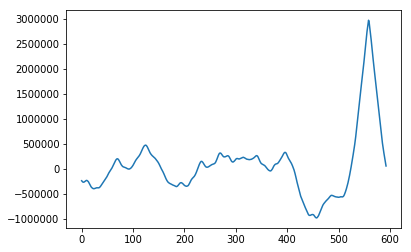

LazwardMare.mp3: shifting by 558.


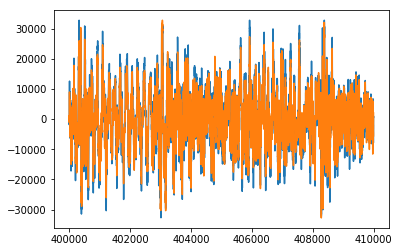

sox WARN sox: `/tmp/tmpgqnlfnb6/on_vocal.wav' output clipped 13290 samples; decrease volume?
sox WARN sox: `/tmp/tmpgqnlfnb6/off_vocal.wav' output clipped 3406 samples; decrease volume?
LieToMe.mp3: shifting by 0.


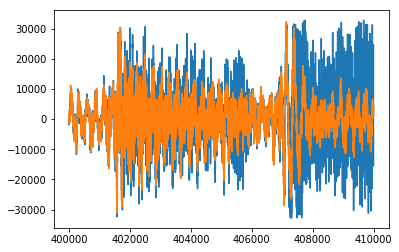

sox WARN sox: `/tmp/tmpw3vg1kr9/on_vocal.wav' output clipped 1764 samples; decrease volume?
sox WARN sox: `/tmp/tmpw3vg1kr9/off_vocal.wav' output clipped 1635 samples; decrease volume?


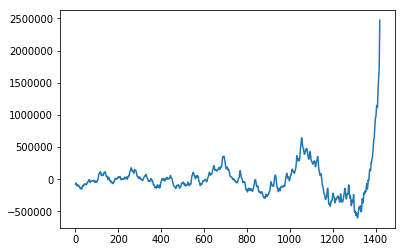

LittleBadSong.mp3: shifting by 1419.


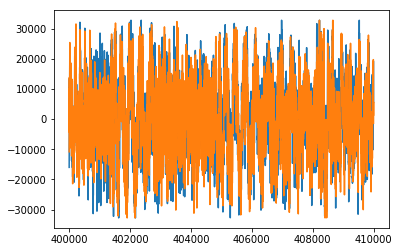

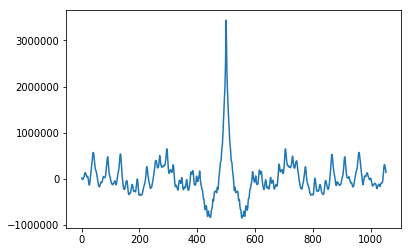

MahougaUmaretaHi.mp3: shifting by 500.


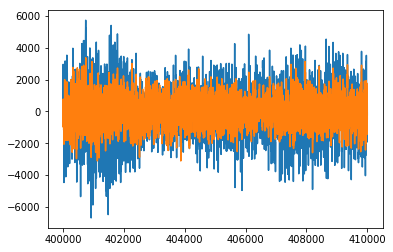

sox WARN sox: `/tmp/tmpm3wd391u/on_vocal.wav' output clipped 783 samples; decrease volume?
sox WARN sox: `/tmp/tmpm3wd391u/off_vocal.wav' output clipped 180 samples; decrease volume?


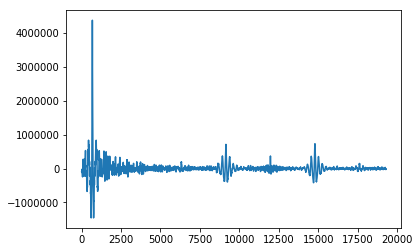

MasshironoYuki.mp3: shifting by 679.


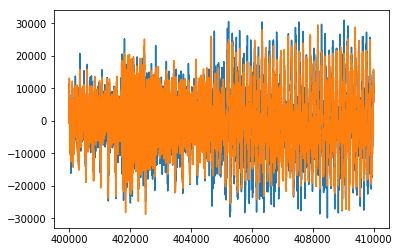

sox WARN sox: `/tmp/tmpyf_eywel/on_vocal.wav' output clipped 1451 samples; decrease volume?
sox WARN sox: `/tmp/tmpyf_eywel/off_vocal.wav' output clipped 442 samples; decrease volume?
Mermaid.mp3: shifting by 0.


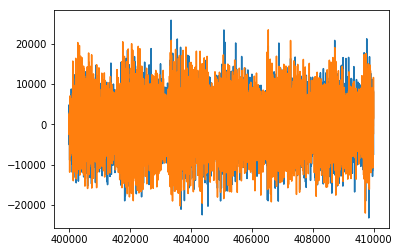

sox WARN sox: `/tmp/tmpeemp__63/on_vocal.wav' output clipped 2373 samples; decrease volume?
sox WARN sox: `/tmp/tmpeemp__63/off_vocal.wav' output clipped 1223 samples; decrease volume?


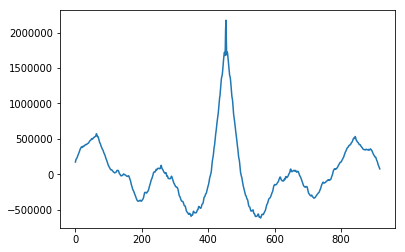

MetempsychosisBlossoms.mp3: shifting by 453.


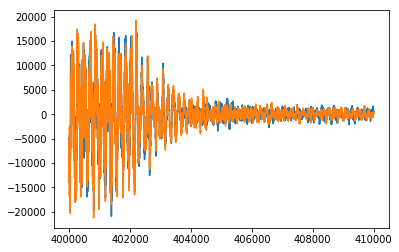

sox WARN sox: `/tmp/tmp126ky_th/on_vocal.wav' output clipped 766 samples; decrease volume?
sox WARN sox: `/tmp/tmp126ky_th/off_vocal.wav' output clipped 1717 samples; decrease volume?


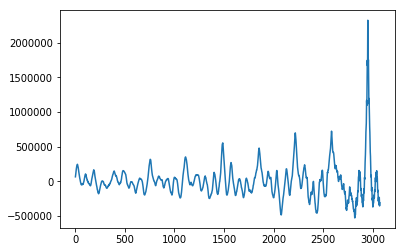

MikitekiRenaiGusha.mp3: shifting by 2951.


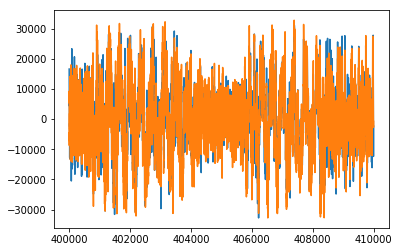

sox WARN sox: `/tmp/tmpmwpg2xp4/on_vocal.wav' output clipped 1392 samples; decrease volume?
sox WARN sox: `/tmp/tmpmwpg2xp4/off_vocal.wav' output clipped 1159 samples; decrease volume?


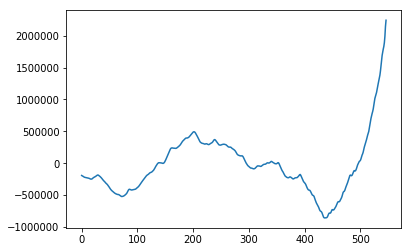

MindTrigger.mp3: shifting by 546.


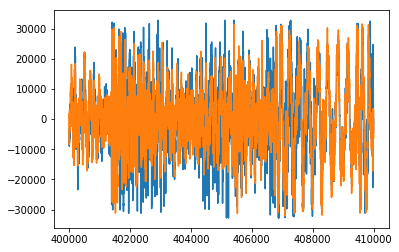

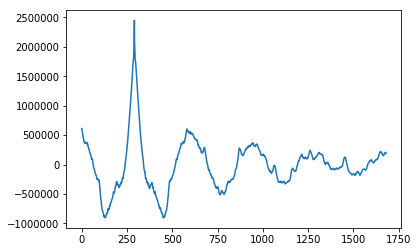

Moonlight.mp3: shifting by 291.


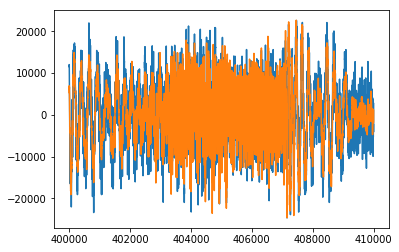

sox WARN sox: `/tmp/tmp2k4t_o18/on_vocal.wav' output clipped 13588 samples; decrease volume?
sox WARN sox: `/tmp/tmp2k4t_o18/off_vocal.wav' output clipped 6004 samples; decrease volume?
<class 'numpy.int16'>


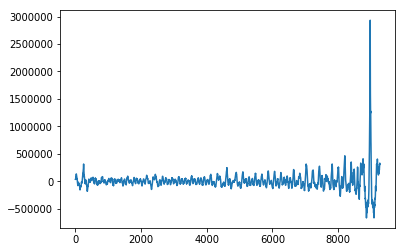

Moonscraper.mp3: shifting by 8977.


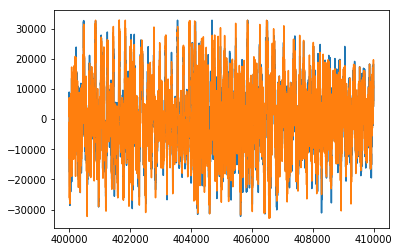

MujakitoIuNanoSeigi.mp3: shifting by 0.


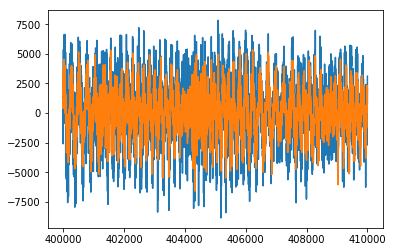

sox WARN sox: `/tmp/tmp10qz_xx8/on_vocal.wav' output clipped 5768 samples; decrease volume?
sox WARN sox: `/tmp/tmp10qz_xx8/off_vocal.wav' output clipped 836 samples; decrease volume?


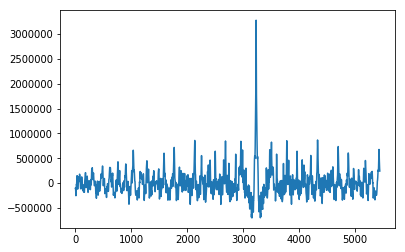

Muketsu.mp3: shifting by 3230.


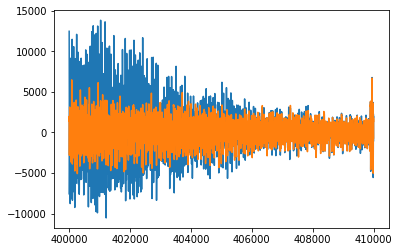

sox WARN sox: `/tmp/tmpnx2qz76h/on_vocal.wav' output clipped 868 samples; decrease volume?
sox WARN sox: `/tmp/tmpnx2qz76h/off_vocal.wav' output clipped 226 samples; decrease volume?


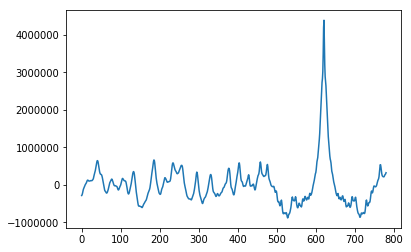

MusouNoYoru.mp3: shifting by 621.


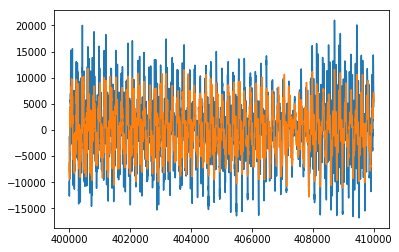

sox WARN sox: `/tmp/tmpa94bu0ud/on_vocal.wav' output clipped 1038 samples; decrease volume?
sox WARN sox: `/tmp/tmpa94bu0ud/off_vocal.wav' output clipped 658 samples; decrease volume?


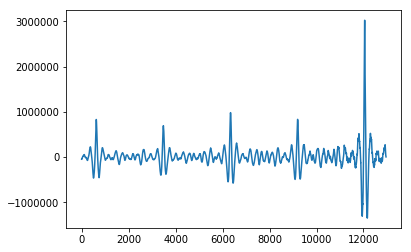

MuzzleFlash.mp3: shifting by 12051.


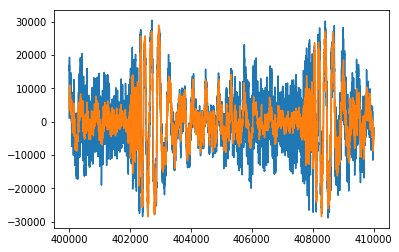

sox WARN sox: `/tmp/tmpqikd2h_s/on_vocal.wav' output clipped 3 samples; decrease volume?
sox WARN sox: `/tmp/tmpqikd2h_s/off_vocal.wav' output clipped 3 samples; decrease volume?


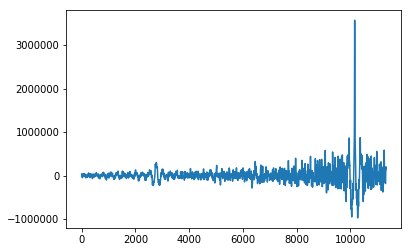

NemuranaiYoruniHoshigaFuru.mp3: shifting by 10161.


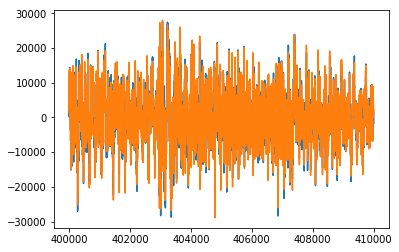

sox WARN sox: `/tmp/tmpr6kmz0fi/on_vocal.wav' output clipped 5614 samples; decrease volume?
sox WARN sox: `/tmp/tmpr6kmz0fi/off_vocal.wav' output clipped 1529 samples; decrease volume?


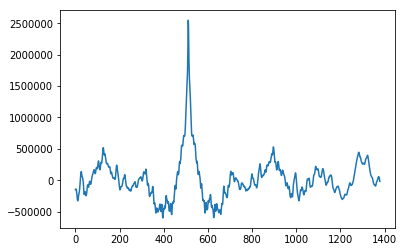

NightmarePrincess.mp3: shifting by 511.


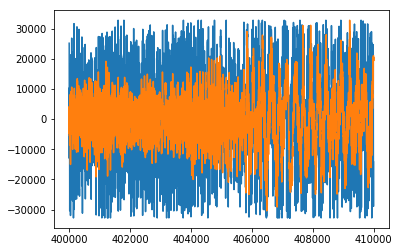

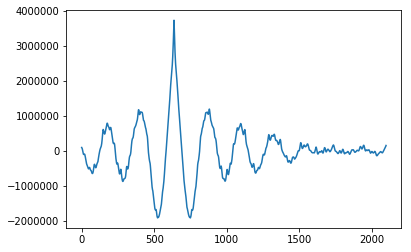

NthSpring.mp3: shifting by 636.


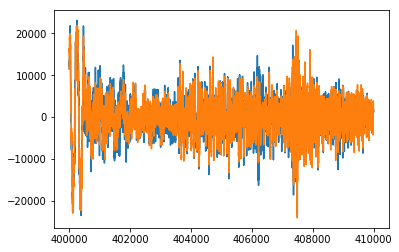

sox WARN sox: `/tmp/tmpdrhkl69l/on_vocal.wav' output clipped 6 samples; decrease volume?


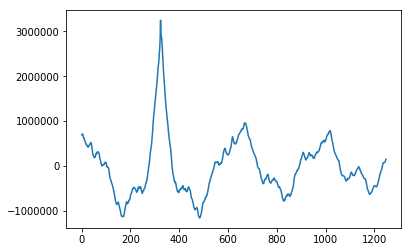

Poisonbody.mp3: shifting by 324.


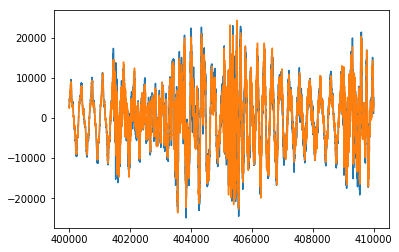

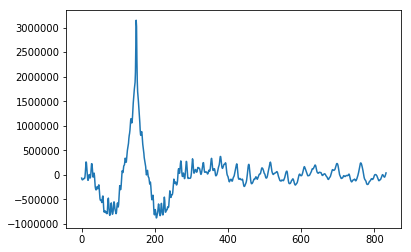

Reincarnation.mp3: shifting by 149.


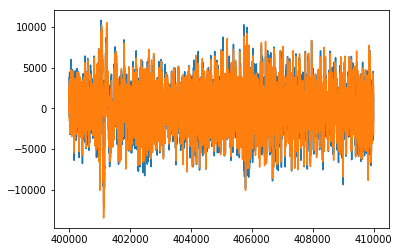

sox WARN sox: `/tmp/tmpxbcps4na/on_vocal.wav' output clipped 358 samples; decrease volume?
sox WARN sox: `/tmp/tmpxbcps4na/off_vocal.wav' output clipped 831 samples; decrease volume?


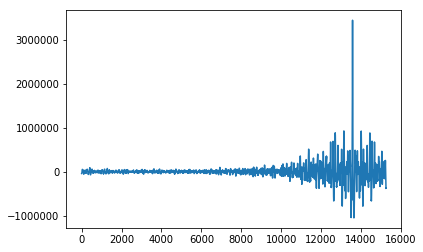

ReiriisCatRing.mp3: shifting by 13584.


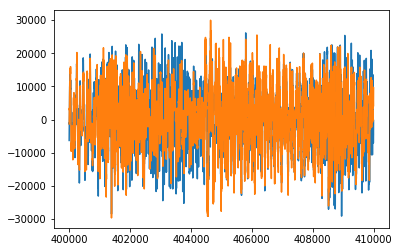

sox WARN sox: `/tmp/tmppi_ly2a4/on_vocal.wav' output clipped 2173 samples; decrease volume?
sox WARN sox: `/tmp/tmppi_ly2a4/off_vocal.wav' output clipped 245 samples; decrease volume?


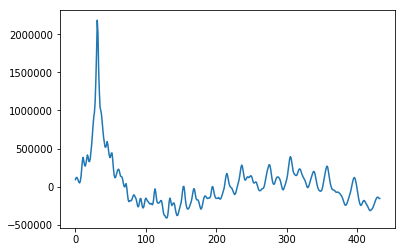

RigurusunoKodoku.mp3: shifting by 31.


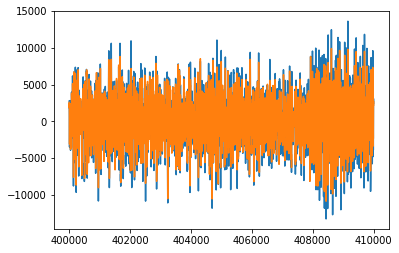

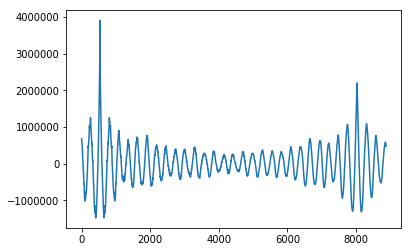

RunThroughtheNight.mp3: shifting by 533.


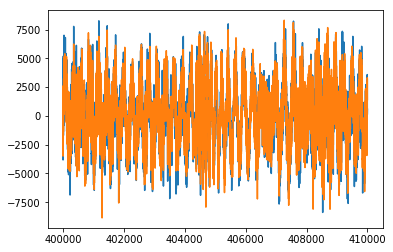

sox WARN sox: `/tmp/tmpfeu0u37p/on_vocal.wav' output clipped 18078 samples; decrease volume?
sox WARN sox: `/tmp/tmpfeu0u37p/off_vocal.wav' output clipped 5333 samples; decrease volume?
SagiriNoTomoshibi.mp3: shifting by 0.


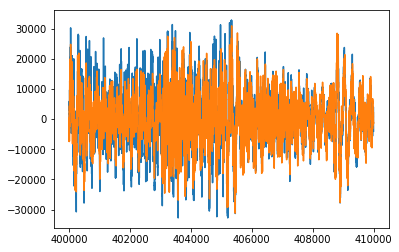

sox WARN sox: `/tmp/tmpavj6zr7c/on_vocal.wav' output clipped 16921 samples; decrease volume?
sox WARN sox: `/tmp/tmpavj6zr7c/off_vocal.wav' output clipped 5764 samples; decrease volume?


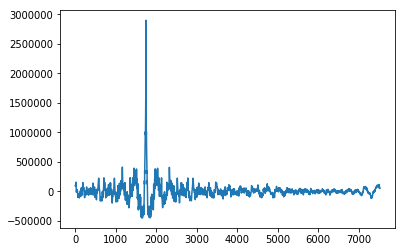

SakuraKaze.mp3: shifting by 1740.


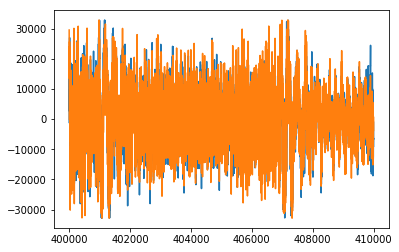

sox WARN sox: `/tmp/tmpo2dq0usn/on_vocal.wav' output clipped 1471 samples; decrease volume?
sox WARN sox: `/tmp/tmpo2dq0usn/off_vocal.wav' output clipped 772 samples; decrease volume?


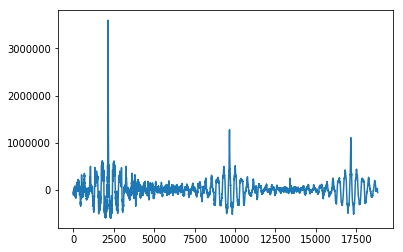

SayHelloToMe.mp3: shifting by 2157.


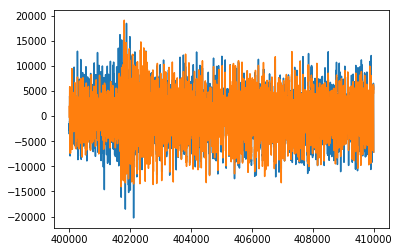

sox WARN sox: `/tmp/tmpia8hs2ns/on_vocal.wav' output clipped 680 samples; decrease volume?
sox WARN sox: `/tmp/tmpia8hs2ns/off_vocal.wav' output clipped 89 samples; decrease volume?


In [ ]:
all_data = []
for on_vocal, off_vocal in zip(on_vocal_files, off_vocal_files):
  songfilename = os.path.basename(on_vocal)
  #if 'Metemp' not in songfilename:
  #      continue
  tmpdir = tempfile.mkdtemp()
  filename = Path(os.path.join(tmpdir, 'on_vocal.wav')).as_posix()
  !sox "$on_vocal" "$filename"
  data_on = scipy.io.wavfile.read(filename)
  
  filename = Path(os.path.join(tmpdir, 'off_vocal.wav')).as_posix()
  !sox "$off_vocal" "$filename"
  data_off = scipy.io.wavfile.read(filename)
  shutil.rmtree(tmpdir)
  
  assert data_on[0] == data_off[0] == SAMPLING_RATE
  a, b = data_on[1][:, 0], data_off[1][:, 0]
  swapped = False
  if len(b) > len(a):
    a, b = b, a
    swapped = True
  thres=5000
  a_zero_noise_length = np.sort(np.where(a>200)[0])[0]
  b_zero_noise_length = np.sort(np.where(b>200)[0])[0]
  diff = b_zero_noise_length - a_zero_noise_length
  #a = np.concatenate([a,np.zeros(500)],0)
  #b = b[500:]
  shorten_b_list = ['MetempsychosisBlossoms.mp3', 'JedarunoKaikou.mp3']
  pad_a_list = ['TrickorDream.mp3', 'Moonscraper.mp3', 'HalloweenNightParade.mp3']
  padded = False
  if songfilename in shorten_b_list:
      b = b[500:]
  elif songfilename in pad_a_list:
      a = np.concatenate([a,np.zeros(500).astype(np.int16)],0)
      print(type(a[0]))
      padded = True
  elif b_zero_noise_length > a_zero_noise_length and diff<5000:      
      b = b[min(diff+500, b_zero_noise_length):]
  
        
  shift = FindInSeq(a, b)
  print('%s: shifting by %d.' % (os.path.basename(on_vocal), shift))
  if padded:
      a = a[:-500]
  a = a[shift:shift+len(b)]
  if len(a) < len(b):
        b = b[:len(a)]
  if swapped:
    a, b = b, a
  data_on, data_off = a, b
  all_data.append((os.path.basename(on_vocal), data_on, data_off))
  
  plot_len = 10000
  step = 1
  start = 400000
  plt.plot(range(start, start + plot_len, step), data_on[start:start+plot_len:step], label="data_on")
  plt.plot(range(start, start + plot_len, step), data_off[start:start+plot_len:step], label="data_off")
  plt.show()
 
  #CHECK RIGURUSU NTHSPRING

In [136]:
problem_children = ['AmenoKaze','AkakuYurameku', 'Astro=Hope','BakerBakerParadox','HalloweenNightParade','JedarunoKaikou',
'Landscape','LittleBadSong', 'MasshironoYuki','MetempsychosisBlossoms','MindTrigger', 'Moonscraper','ShinoShoujo','Spherelight','Sprite100',
'TrickorDream','WalkAlone','RigurusunoKodoku']
problem_children = [string + '.mp3' for string in problem_children]
print(problem_children)

from scipy.io import wavfile
#print(all_data[4][0])

for idx in range(len(all_data)):
    if all_data[idx][0] in problem_children:
        wavfile.write('data/check_these/'+all_data[idx][0].replace('.mp3','OnVocalShifted2.wav'), 16000, all_data[idx][1])
        wavfile.write('data/check_these/'+all_data[idx][0].replace('.mp3','OffVocalShifted2.wav'), 16000, all_data[idx][2])

#wavfile.write('test.wav', 16000, all_data[4][1])

['AmenoKaze.mp3', 'AkakuYurameku.mp3', 'Astro=Hope.mp3', 'BakerBakerParadox.mp3', 'HalloweenNightParade.mp3', 'JedarunoKaikou.mp3', 'Landscape.mp3', 'LittleBadSong.mp3', 'MasshironoYuki.mp3', 'MetempsychosisBlossoms.mp3', 'MindTrigger.mp3', 'Moonscraper.mp3', 'ShinoShoujo.mp3', 'Spherelight.mp3', 'Sprite100.mp3', 'TrickorDream.mp3', 'WalkAlone.mp3', 'RigurusunoKodoku.mp3']


In [19]:
#print(train_data['Stella-rium.mp3'][0].shape)
import sys
print(sys.getsizeof(train_data['Stella-rium.mp3'][0]))
print(type(train_data['Stella-rium.mp3'][0][0]))

NameError: name 'train_data' is not defined

In [141]:
import sys

idx = np.array(range(len(all_data)))
np.random.seed(12345678)
#np.random.shuffle(idx)
num_train = int(0.75 * len(all_data))

test_files = ['Dearest.mp3', 'KazegaSaeruyoriHayaku.mp3', 'Encounter.mp3', 'KyoumeiShinaiAinoKatachi.mp3']

train_data = {}
for i in range(num_train):
  filename, data_on, data_off = all_data[idx[i]]
  train_data[filename] = data_on, data_off
print('Train:', train_data.keys())
print(data_dir)
with open(os.path.join(str(data_dir), 'train.pkl.gz'), 'wb') as f:
    pickle.dump(train_data, f, protocol=pickle.HIGHEST_PROTOCOL)
    
test_data = {}
for i in range(num_train, len(all_data)):
  filename, data_on, data_off = all_data[idx[i]]
  test_data[filename] = data_on, data_off
print('Test:', test_data.keys())
with open(os.path.join(str(data_dir), 'test.pkl.gz'), 'wb') as f:
    pickle.dump(test_data, f, protocol=pickle.HIGHEST_PROTOCOL)

Train: dict_keys(['MusouNoYoru.mp3', 'Landscape.mp3', 'BelieveInYourFantasy.mp3', 'Muketsu.mp3', 'ReiriisCatRing.mp3', 'SakuraKaze.mp3', 'ChiyoriUtau.mp3', 'MetempsychosisBlossoms.mp3', 'Reincarnation.mp3', 'SagiriNoTomoshibi.mp3', 'AmenoLive.mp3', 'HalloweenNightParade.mp3', 'JedarunoKaikou.mp3', 'HighFreeSpirits.mp3', 'HitodenashiRomanesque.mp3', 'GanbareJukensei.mp3', 'Innocence.mp3', 'GetYourPartyOn.mp3', 'MujakitoIuNanoSeigi.mp3', 'Mermaid.mp3', 'RunThroughtheNight.mp3', 'Dearest.mp3', 'MindTrigger.mp3', 'MahougaUmaretaHi.mp3', 'NthSpring.mp3', 'JanoMichi.mp3', 'AnatawoMamoruKentoNarou.mp3', 'LWCO.mp3', 'MuzzleFlash.mp3', 'FarAwayHighWay.mp3', 'Moonlight.mp3', 'LieToMe.mp3', 'Encounter.mp3', 'HatsukoiStroke.mp3', 'AlbatrossnoTegami.mp3', 'FukagyakuGetsuShitaTouhikou.mp3', 'KoinoSerenade.mp3', 'Astro=Hope.mp3', 'LazwardMare.mp3', 'KyoumeiShinaiAinoKatachi.mp3', 'Depressing.mp3', 'HanoGotoku.mp3', 'KoyoimoKyuutodeAimashou.mp3', 'IncubatedDream.mp3', 'Poisonbody.mp3', 'BakerBakerPara

In [140]:
import sys

idx = np.array(range(len(all_data)))
np.random.seed(12345678)
#np.random.shuffle(idx)
num_train = int(0.75 * len(all_data))

test_files = ['Dearest.mp3', 'KazegaSaeruyoriHayaku.mp3', 'Encounter.mp3', 'KyoumeiShinaiAinoKatachi.mp3']

train_data = {}
test_data = {}
for i in range(len(all_data)):
  filename, data_on, data_off = all_data[idx[i]]
  assert len(data_on) == len(data_off)
  if filename in test_files:
    test_data[filename] = data_on, data_off
  else:
    train_data[filename] = data_on, data_off
  
print('Train:', train_data.keys())
with open(os.path.join(str(data_dir), 'train.pkl.gz'), 'wb') as f:
    pickle.dump(train_data, f, protocol=pickle.HIGHEST_PROTOCOL)
    
#for i in range(num_train, len(all_data)):
#  filename, data_on, data_off = all_data[idx[i]]
#  test_data[filename] = data_on, data_off
print('Test:', test_data.keys())
with open(os.path.join(str(data_dir), 'test.pkl.gz'), 'wb') as f:
    pickle.dump(test_data, f, protocol=pickle.HIGHEST_PROTOCOL)

Train: dict_keys(['WalkAlone.mp3', 'MusouNoYoru.mp3', 'Landscape.mp3', 'BelieveInYourFantasy.mp3', 'Muketsu.mp3', 'ReiriisCatRing.mp3', 'ShinkuuShokan.mp3', 'SakuraKaze.mp3', 'ChiyoriUtau.mp3', 'MetempsychosisBlossoms.mp3', 'Reincarnation.mp3', 'SagiriNoTomoshibi.mp3', 'AmenoLive.mp3', 'HalloweenNightParade.mp3', 'JedarunoKaikou.mp3', 'HighFreeSpirits.mp3', 'xxwrzvdli.mp3', 'HitodenashiRomanesque.mp3', 'GanbareJukensei.mp3', 'Innocence.mp3', 'GetYourPartyOn.mp3', 'MujakitoIuNanoSeigi.mp3', 'LieToMe.mp3', 'RunThroughtheNight.mp3', 'MuzzleFlash.mp3', 'MindTrigger.mp3', 'MahougaUmaretaHi.mp3', 'NthSpring.mp3', 'LittleBadSong.mp3', 'AnatawoMamoruKentoNarou.mp3', 'LWCO.mp3', 'FarAwayHighWay.mp3', 'Moonlight.mp3', 'Mermaid.mp3', 'SoranoLive.mp3', 'SayHelloToMe.mp3', 'HatsukoiStroke.mp3', 'AlbatrossnoTegami.mp3', 'UchuunoKodomo.mp3', 'UkyounoShinzou.mp3', 'Spherelight.mp3', 'SoukyuuRealize.mp3', 'FukagyakuGetsuShitaTouhikou.mp3', 'KoinoSerenade.mp3', 'ShinoShoujo.mp3', 'Astro=Hope.mp3', 'Lazw

In [ ]:
Train: dict_keys(['Stella-rium.mp3', 'WalkThisWay.mp3', 'TanjoubinoKodomotachi.mp3', 'ChiyoriUtau.mp3', 'MujakitoIuNanoSeigi.mp3', 'Muketsu.mp3', 'Sakurakaze.mp3', 'RunThroughtheNight.mp3', 'MahougaUmaretaHi.mp3', 'Reincarnation.mp3'])
/home/joe/projects/hypetrain/deepkaraoke/data/16k
Test: dict_keys(['Dearest.mp3', 'KazegaSaeruyoriHayaku.mp3', 'Encounter.mp3', 'KyoumeiShinaiAinoKatachi.mp3'])

In [ ]:
data_dir = '/home/joe/projects/hypetrain/deepkaraoke/data/16k'
print(os.path.join(data_dir, 'train.pkl.gz'))
with open(os.path.join(data_dir, 'train.pkl.gz'), 'wb') as f:
    print(f)